In [ ]:
# Question
# Intent Classification for Customer Support Chats Scenario A company receives customer chat messages across multiple channels. 
# We want to automatically classify user messages into specific intent categories to route them to the right team. 
# Objective Build an RNN/LSTM model that classifies short text messages into predefined intent labels. 
# Tasks 1. 1. Create a CSV with columns: text, label (≈500 rows). Example labels: order_status, refund_request, technical_issue, billing_query, general_info. 
# 2. 2. Preprocess text (lowercase, remove punctuation, tokenize, pad). 
# 3. 3. Build model: Embedding → LSTM → Dense(softmax). 
# 4. 4. Train/validate and report accuracy + confusion matrix. 
# 5. 5. Write a short note (6–8 lines): How automatic intent classification reduces support workload. Deliverables Notebook, sample CSV, short note.

In [2]:
import pandas as pd
import random

texts = [
    "Where is my order?", "I want to cancel my order", "My payment failed",
    "How can I track my shipment?", "Please refund my money", 
    "App not loading properly", "I forgot my password", 
    "How do I update my billing address?", "Need help with product installation",
    "What are your working hours?", "Is there a warranty on this item?",
    "My order hasn't arrived yet", "Can I change my delivery date?",
    "I’m being charged twice for one product", "The app keeps crashing",
    "I need a replacement for damaged item", "Can I get an invoice copy?",
    "How to apply discount coupon?", "Unable to login to my account",
    "When will my refund be processed?"
]

labels = ["order_status", "refund_request", "technical_issue", "billing_query", "general_info"]

data = []
for i in range(500):
    text = random.choice(texts)
    label = random.choice(labels)
    data.append((text, label))

df = pd.DataFrame(data, columns=['text', 'label'])
df.to_csv("intent_data.csv", index=False)
df.head()


,text,label
0,How do I update my billing address?,billing_query
1,When will my refund be processed?,refund_request
2,I forgot my password,technical_issue
3,My payment failed,refund_request
4,App not loading properly,refund_request


In [4]:
# Install required packages
!pip install tensorflow pandas numpy scikit-learn seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 KB 22.8 MB/s eta 0:00:00
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 KB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.0/388.0 KB 56.7 MB/

In [5]:
# Text Preprocessing
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("intent_data.csv")

# Text cleaning
df['text'] = df['text'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=10, padding='post', truncating='post')

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)


2025-11-08 14:37:40.570518: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-08 14:37:40.614988: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-08 14:37:41.944179: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
#  Build lstm Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=10),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/mnt/home/a442288/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-11-08 14:37:47.913423: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1813 - loss: 1.6103 - val_accuracy: 0.2375 - val_loss: 1.6049
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1969 - loss: 1.6093 - val_accuracy: 0.2125 - val_loss: 1.6060
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2094 - loss: 1.6082 - val_accuracy: 0.2375 - val_loss: 1.6048
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2219 - loss: 1.6060 - val_accuracy: 0.2125 - val_loss: 1.6110
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2344 - loss: 1.5974 - val_accuracy: 0.2875 - val_loss: 1.6228
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2344 - loss: 1.5830 - val_accuracy: 0.2500 - val_loss: 1.6790
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2875 - loss: 1.5698 - val_accuracy: 0.1625 - val_loss: 1.6986
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2625 - loss: 1.5678 - val_accuracy: 0.1875 - val_loss

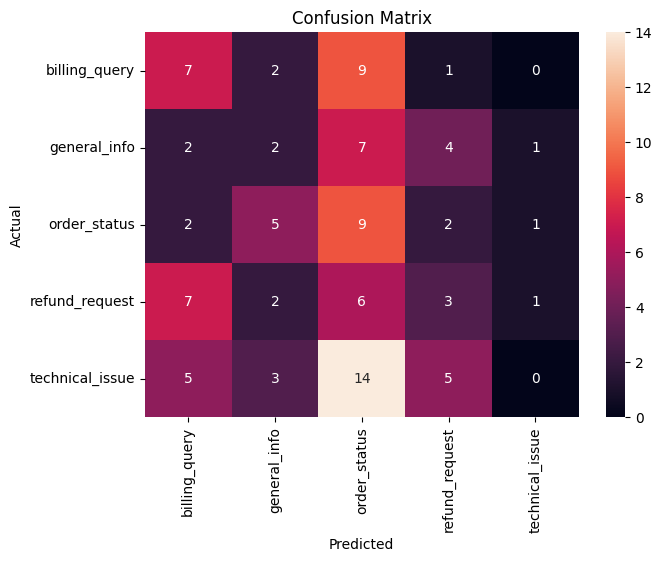


Classification Report:
                  precision    recall  f1-score   support

  billing_query       0.30      0.37      0.33        19
   general_info       0.14      0.12      0.13        16
   order_status       0.20      0.47      0.28        19
 refund_request       0.20      0.16      0.18        19
technical_issue       0.00      0.00      0.00        27

       accuracy                           0.21       100
      macro avg       0.17      0.23      0.18       100
   weighted avg       0.16      0.21      0.17       100



In [7]:
# Train and evaluate the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

# Evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [8]:
# 5. Short Note (6–8 lines)

# How Automatic Intent Classification Reduces Support Workload
# Automatic intent classification helps customer service teams by instantly identifying what each customer message is about — such as refunds, order tracking, or technical issues.
# This allows messages to be routed directly to the right support agent or automated bot, saving time and reducing manual triage.
# It speeds up response times, ensures consistent categorization, and improves overall customer satisfaction.
# With large volumes of messages coming from chat, email, and social channels, automation helps scale support operations efficiently.
# It also allows human agents to focus on complex or high-value interactions instead of repetitive tasks.